To try to implement global eta in phi instead of in F, using conv_sets_globphi (version I made to try to add global eta to X instead!!)

In [1]:
#imports
import uproot as ur
import awkward as ak
import numpy as np

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "2" #specify GPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf

# energyflow imports
import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import graph_util as gu
import plot_util as pu

from scipy.interpolate import interp1d

In [2]:
from Week7_PFNutils import *

In [3]:
data_path = '/fast_scratch/atlas_images/v01-45/' 
file = np.load(data_path+'nn_globphi_w8.npz')

In [4]:
X_train = file['arr_0']
X_val = file['arr_1']
X_test = file['arr_2']
Y_train = file['arr_3']
Y_val = file['arr_4']
Y_test = file['arr_5']

In [5]:
eta_train = file['arr_6']
eta_val = file['arr_7']
eta_test = file['arr_8']

In [6]:
#first run a model with only eta as global F var
X_glob_train = np.array(eta_train)
X_glob_vali = np.array(eta_val)
X_glob_test = np.array(eta_test)

In [7]:
#use the 'no glob' model from before for glob phi
def modelNmetrics_globphi(X_train, X_val, X_test, Y_train, Y_val, Y_test, epochs, batch_size, filename, psize):
    #run the model & create the metrics
    
    Phi_sizes, F_sizes = psize, (100, 100, 100)
   
    #make the model:
    pfn = PFN(input_dim=X_train.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes)#, num_global_features =1)
    
    #try callbacks:
    callback = tf.keras.callbacks.ModelCheckpoint(data_path+filename, save_best_only=True)
    
    # train model
    history = pfn.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, Y_val), verbose=1, callbacks=[callback])
    
    return history

In [18]:
#make metrics for the no global model, these will be universal
def metrics_gp(model, X_test, selections):

    fps_ng = []
    tps_ng = []
    aucs_ng = []
    for selection in selections:
        preds = model.predict(X_test[selection], batch_size=1000) 
        pfn_fp, pfn_tp, threshs = roc_curve(Y_test[selection][:,1], preds[:,1])

        fps_ng.append(pfn_fp)
        tps_ng.append(pfn_tp)

        # get area under the ROC curve
        auc = roc_auc_score(Y_test[selection][:,1], preds[:,1])
        aucs_ng.append(auc)
        print('PFN AUC:', auc)
    return fps_ng, tps_ng, aucs_ng

In [8]:
#just incase these are different too?
eta_ranges = np.arange(0., 3.1, .1)+.05

selec_01 = abs(eta_test) < 0.1
selec_02 = (abs(eta_test) >= .1) & (abs(eta_test) < .2)
selec_03 = (abs(eta_test) >= .2) & (abs(eta_test) < .3)
selec_04 = (abs(eta_test) >= .3) & (abs(eta_test) < .4)
selec_05 = (abs(eta_test) >= .4) & (abs(eta_test) < .5)
selec_06 = (abs(eta_test) >= .5) & (abs(eta_test) < .6)
selec_07 = (abs(eta_test) >= .6) & (abs(eta_test) < .7)
selec_08 = (abs(eta_test) >= .7) & (abs(eta_test) < .8)
selec_09 = (abs(eta_test) >= .8) & (abs(eta_test) < .9)
selec_10 = (abs(eta_test) >= .9) & (abs(eta_test) < 1.)
selec_11 = (abs(eta_test) >= 1.) & (abs(eta_test) < 1.1)
selec_12 = (abs(eta_test) >= 1.1) & (abs(eta_test) < 1.2)
selec_13 = (abs(eta_test) >= 1.2) & (abs(eta_test) < 1.3)
selec_14 = (abs(eta_test) >= 1.3) & (abs(eta_test) < 1.4)
selec_15 = (abs(eta_test) >= 1.4) & (abs(eta_test) < 1.5)
selec_16 = (abs(eta_test) >= 1.5) & (abs(eta_test) < 1.6)
selec_17 = (abs(eta_test) >= 1.6) & (abs(eta_test) < 1.7)
selec_18 = (abs(eta_test) >= 1.7) & (abs(eta_test) < 1.8)
selec_19 = (abs(eta_test) >= 1.8) & (abs(eta_test) < 1.9)
selec_20 = (abs(eta_test) >= 1.9) & (abs(eta_test) < 2.)
selec_21 = (abs(eta_test) >= 2.) & (abs(eta_test) < 2.1)
selec_22 = (abs(eta_test) >= 2.1) & (abs(eta_test) < 2.2)
selec_23 = (abs(eta_test) >= 2.2) & (abs(eta_test) < 2.3)
selec_24 = (abs(eta_test) >= 2.3) & (abs(eta_test) < 2.4)
selec_25 = (abs(eta_test) >= 2.4) & (abs(eta_test) < 2.5)
selec_26 = (abs(eta_test) >= 2.5) & (abs(eta_test) < 2.6)
selec_27 = (abs(eta_test) >= 2.6) & (abs(eta_test) < 2.7)
selec_28 = (abs(eta_test) >= 2.7) & (abs(eta_test) < 2.8)
selec_29 = (abs(eta_test) >= 2.8) & (abs(eta_test) < 2.9)
selec_30 = (abs(eta_test) >= 2.9) & (abs(eta_test) < 3.)
selec_all = abs(eta_test) <= 3. 

eta_sel = [selec_01, selec_02, selec_03, selec_04, selec_05, selec_06, selec_07, selec_08, selec_09, selec_10,
              selec_11, selec_12, selec_13, selec_14, selec_15, selec_16, selec_17, selec_18, selec_19, selec_20,
              selec_21, selec_22, selec_23, selec_24, selec_25, selec_26, selec_27, selec_28, selec_29, selec_30,
              selec_all]

In [14]:
#modelNmetrics_globphi(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'pfn_globphi_w8.hdf5')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 5)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    600         input[0][0]                      
__________________________________________________________________________________________________
activation_7 (Activation)       (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_7[0][0]               
____________________________________________________________________________________________

In [9]:
#the global eta in phi model
gphi_model = tf.keras.models.load_model(data_path+'pfn_globphi_w8.hdf5')

#the global eta in F model
model_glob = tf.keras.models.load_model(data_path+'w6_pfn_bigtest.hdf5')

#the no global features model:
model_nog = tf.keras.models.load_model(data_path+'w6_pfn_noglob.hdf5')

#the no ID, global eta in F model:
#model_noid = tf.keras.models.load_model(data_path+'w8_pfn_noID.hdf5')

In [11]:
X_test.T[:-1].T.shape

(300000, 2000, 4)

In [10]:
fps_gp_eta, tps_gp_eta, auc_gp_eta = metrics_gp(X_test, eta_sel)
fps_ng_eta, tps_ng_eta, auc_ng_eta = metrics_ng(X_test.T[:-1].T, Y_test, eta_sel)
fps_eta, tps_eta, auc_eta = metrics(model_glob, X_test.T[:-1].T, X_glob_test, Y_test, eta_sel)

PFN AUC: 0.9764983036818846
PFN AUC: 0.9777919061667135
PFN AUC: 0.9774282352079318
PFN AUC: 0.9770863680081557
PFN AUC: 0.9786260546541661
PFN AUC: 0.9761069316249372
PFN AUC: 0.9783704355227366
PFN AUC: 0.9766252244011739
PFN AUC: 0.9753697967136825
PFN AUC: 0.9740643711485448
PFN AUC: 0.9744588245117547
PFN AUC: 0.9743613741212725
PFN AUC: 0.9684531527291121
PFN AUC: 0.9540955275330274
PFN AUC: 0.9110740734448127
PFN AUC: 0.9247568325674236
PFN AUC: 0.9391407156869744
PFN AUC: 0.9269240462002148
PFN AUC: 0.9251879281072444
PFN AUC: 0.9296512850998998
PFN AUC: 0.9444043537021518
PFN AUC: 0.9447601400435364
PFN AUC: 0.9463883905617181
PFN AUC: 0.950651126417708
PFN AUC: 0.945439894640165
PFN AUC: 0.9544768504607373
PFN AUC: 0.981168573041199
PFN AUC: 0.98198523907663
PFN AUC: 0.9817639222097195
PFN AUC: 0.9851065634213855
PFN AUC: 0.9606268600034473
PFN AUC: 0.9786505142068026
PFN AUC: 0.9806688589996232
PFN AUC: 0.9799284271158328
PFN AUC: 0.9792574976234194
PFN AUC: 0.98061205853248

In [11]:
reg95_ng_eta = interp95(fps_ng_eta, tps_ng_eta)
reg95_gp_eta = interp95(fps_gp_eta, tps_gp_eta)
reg95_eta = interp95(fps_eta, tps_eta)
#reg95_eta_noid = interp95(fps_noid_eta, tps_noid_eta)

/home/kaelaekd/start_tf/LCStudies/classifier/Week7_PFNutils.py:79: RuntimeWarning: divide by zero encountered in true_divide
  fg.append(interp1d(tps[i], 1/fps[i]))


In [21]:
fps_gp_eta[0].shape

(1173,)

In [16]:
np.savez(data_path+'w8_modelmetrics2plot.npz', fps_gp_eta, tps_gp_eta, auc_gp_eta, fps_ng_eta, tps_ng_eta, auc_ng_eta, fps_eta, tps_eta, auc_eta, reg95_ng_eta, reg95_gp_eta, reg95_eta, eta_sel, dtype=object)

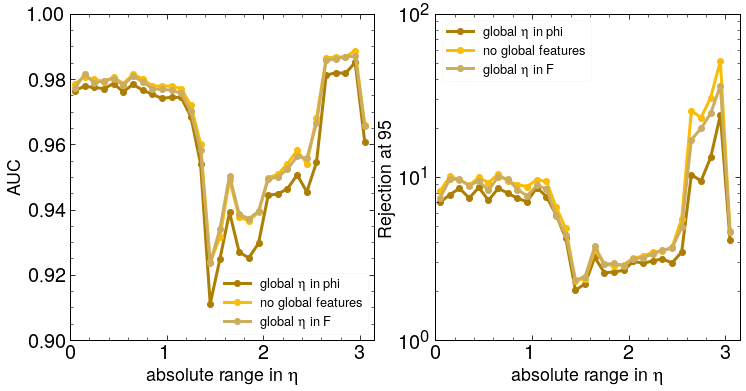

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])

ax1.set_xlim(0., max(eta_ranges)+.1)
ax1.plot(eta_ranges, auc_gp_eta, linewidth=3, c='xkcd:mustard brown', marker='o', label='global $\eta$ in phi')
ax1.plot(eta_ranges, auc_ng_eta, linewidth=3, c='xkcd:golden rod', marker='o', label='no global features')
ax1.plot(eta_ranges, auc_eta, linewidth=3, c='xkcd:desert', marker='o', label='global $\eta$ in F')
#ax1.plot(eta_ranges, auc_noid_eta, linewidth=3, c='xkcd:muddy brown', marker='o', label='global $\eta$ in F, no ID')
ax1.set_xlabel('absolute range in $\eta$')
ax1.set_ylabel('AUC')
ax1.legend()

ax2.semilogy()
ax2.set_xlim(0., max(eta_ranges)+.1)
ax2.plot(eta_ranges, reg95_gp_eta, linewidth=3, c='xkcd:mustard brown', marker='o', label='global $\eta$ in phi')
ax2.plot(eta_ranges, reg95_ng_eta, linewidth=3, c='xkcd:golden rod', marker='o', label='no global features')
ax2.plot(eta_ranges, reg95_eta, linewidth=3, c='xkcd:desert', marker='o', label='global $\eta$ in F')
#ax2.plot(eta_ranges, reg95_eta_noid, linewidth=3, c='xkcd:muddy brown', marker='o', label='global $\eta$ in F, no ID')
ax2.set_xlabel('absolute range in $\eta$')
ax2.set_ylabel('Rejection at 95% efficiency')
ax2.legend()

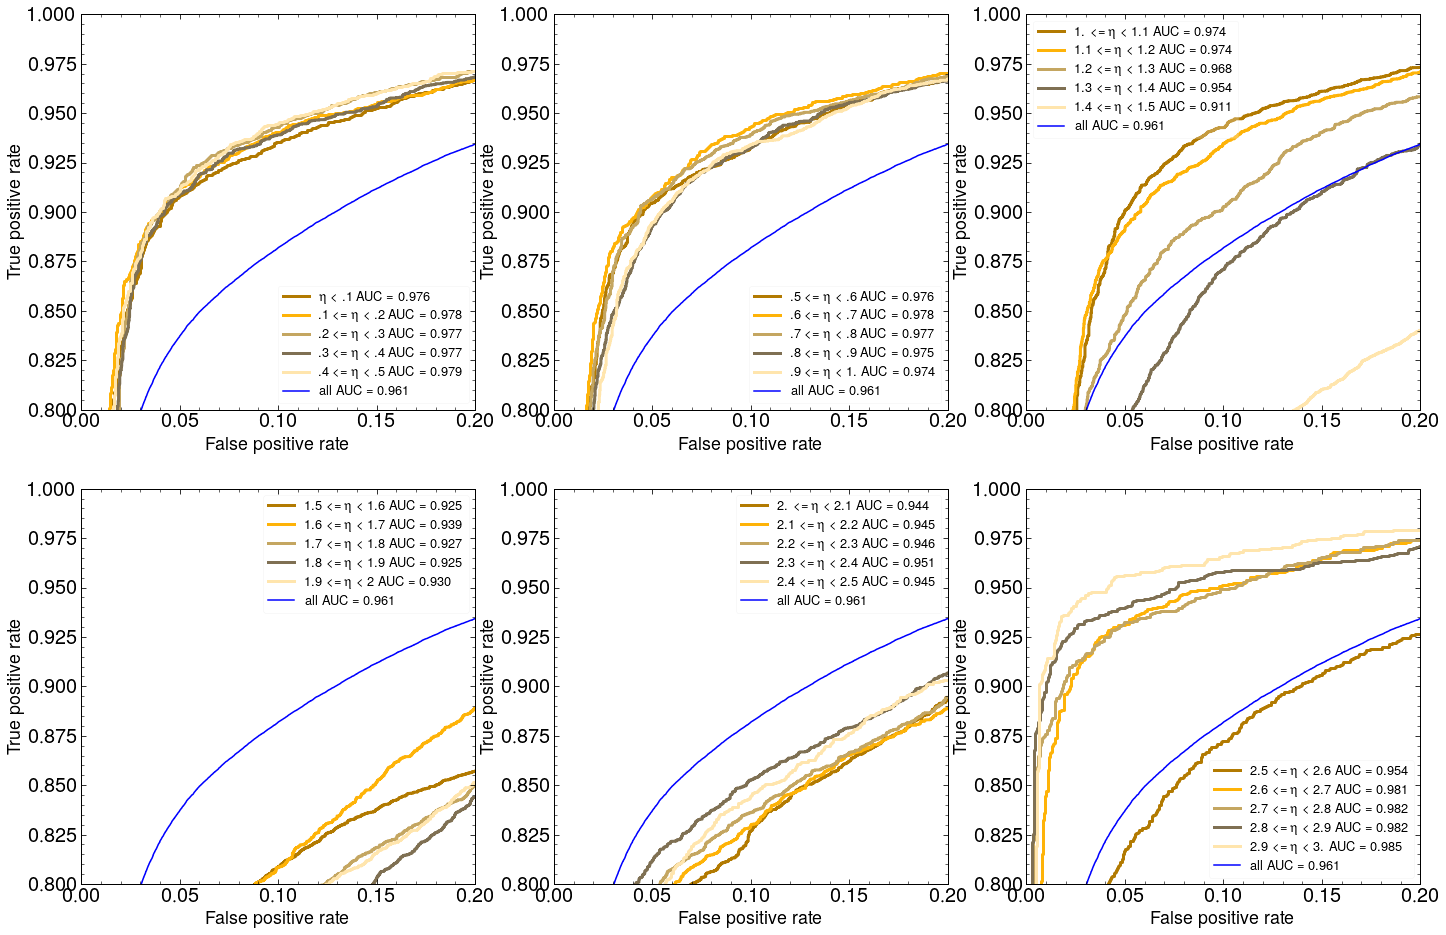

In [27]:
AUCplot(eta_ranges, fps_ng_eta, tps_ng_eta, auc_ng_eta, rangetype='eta')

In [10]:
#now make another one with larger phi:

psize = (150, 150, 192)
history = modelNmetrics_globphi(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'pfn_globphi_bigp_w8.hdf5', psize)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 5)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 150)    900         input[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, None, 150)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 150)    22650       activation[0][0]                 
______________________________________________________________________________________________

In [17]:
bigphi_model = tf.keras.models.load_model(data_path+'pfn_globphi_bigp_w8.hdf5')


In [19]:
fps_bigp_eta, tps_bigp_eta, auc_bigp_eta = metrics_gp(bigphi_model,X_test, eta_sel)
reg95_bigp_eta = interp95(fps_bigp_eta, tps_bigp_eta)

PFN AUC: 0.9773534868312235
PFN AUC: 0.9790290494981091
PFN AUC: 0.9781390611970637
PFN AUC: 0.9777216266043082
PFN AUC: 0.97924874835092
PFN AUC: 0.9775297703718755
PFN AUC: 0.9792463900749493
PFN AUC: 0.9773215351265971
PFN AUC: 0.9756461301726304
PFN AUC: 0.9757988903734366
PFN AUC: 0.9749368641719806
PFN AUC: 0.9748886924193239
PFN AUC: 0.968677599568251
PFN AUC: 0.9557806604681606
PFN AUC: 0.9155789744516918
PFN AUC: 0.9250942143266817
PFN AUC: 0.9429818280074982
PFN AUC: 0.9321541344044344
PFN AUC: 0.9289264216397053
PFN AUC: 0.9320860844251702
PFN AUC: 0.9448039373354893
PFN AUC: 0.9454051020793527
PFN AUC: 0.9462371368102926
PFN AUC: 0.9511872026063801
PFN AUC: 0.947205175891547
PFN AUC: 0.9586597484546704
PFN AUC: 0.9815193387765284
PFN AUC: 0.9833772381082828
PFN AUC: 0.9810040303461356
PFN AUC: 0.9806360964718648
PFN AUC: 0.962075045902572


/home/kaelaekd/start_tf/LCStudies/classifier/Week7_PFNutils.py:79: RuntimeWarning: divide by zero encountered in true_divide
  fg.append(interp1d(tps[i], 1/fps[i]))


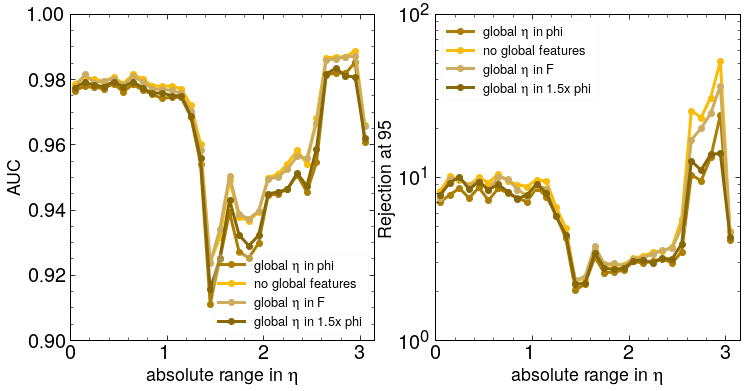

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])

ax1.set_xlim(0., max(eta_ranges)+.1)
ax1.plot(eta_ranges, auc_gp_eta, linewidth=3, c='xkcd:mustard brown', marker='o', label='global $\eta$ in phi')
ax1.plot(eta_ranges, auc_ng_eta, linewidth=3, c='xkcd:golden rod', marker='o', label='no global features')
ax1.plot(eta_ranges, auc_eta, linewidth=3, c='xkcd:desert', marker='o', label='global $\eta$ in F')
ax1.plot(eta_ranges, auc_bigp_eta, linewidth=3, c='xkcd:muddy brown', marker='o', label='global $\eta$ in 1.5x phi')
ax1.set_xlabel('absolute range in $\eta$')
ax1.set_ylabel('AUC')
ax1.legend()

ax2.semilogy()
ax2.set_xlim(0., max(eta_ranges)+.1)
ax2.plot(eta_ranges, reg95_gp_eta, linewidth=3, c='xkcd:mustard brown', marker='o', label='global $\eta$ in phi')
ax2.plot(eta_ranges, reg95_ng_eta, linewidth=3, c='xkcd:golden rod', marker='o', label='no global features')
ax2.plot(eta_ranges, reg95_eta, linewidth=3, c='xkcd:desert', marker='o', label='global $\eta$ in F')
ax2.plot(eta_ranges, reg95_bigp_eta, linewidth=3, c='xkcd:muddy brown', marker='o', label='global $\eta$ in 1.5x phi')
ax2.set_xlabel('absolute range in $\eta$')
ax2.set_ylabel('Rejection at 95% efficiency')
ax2.legend()

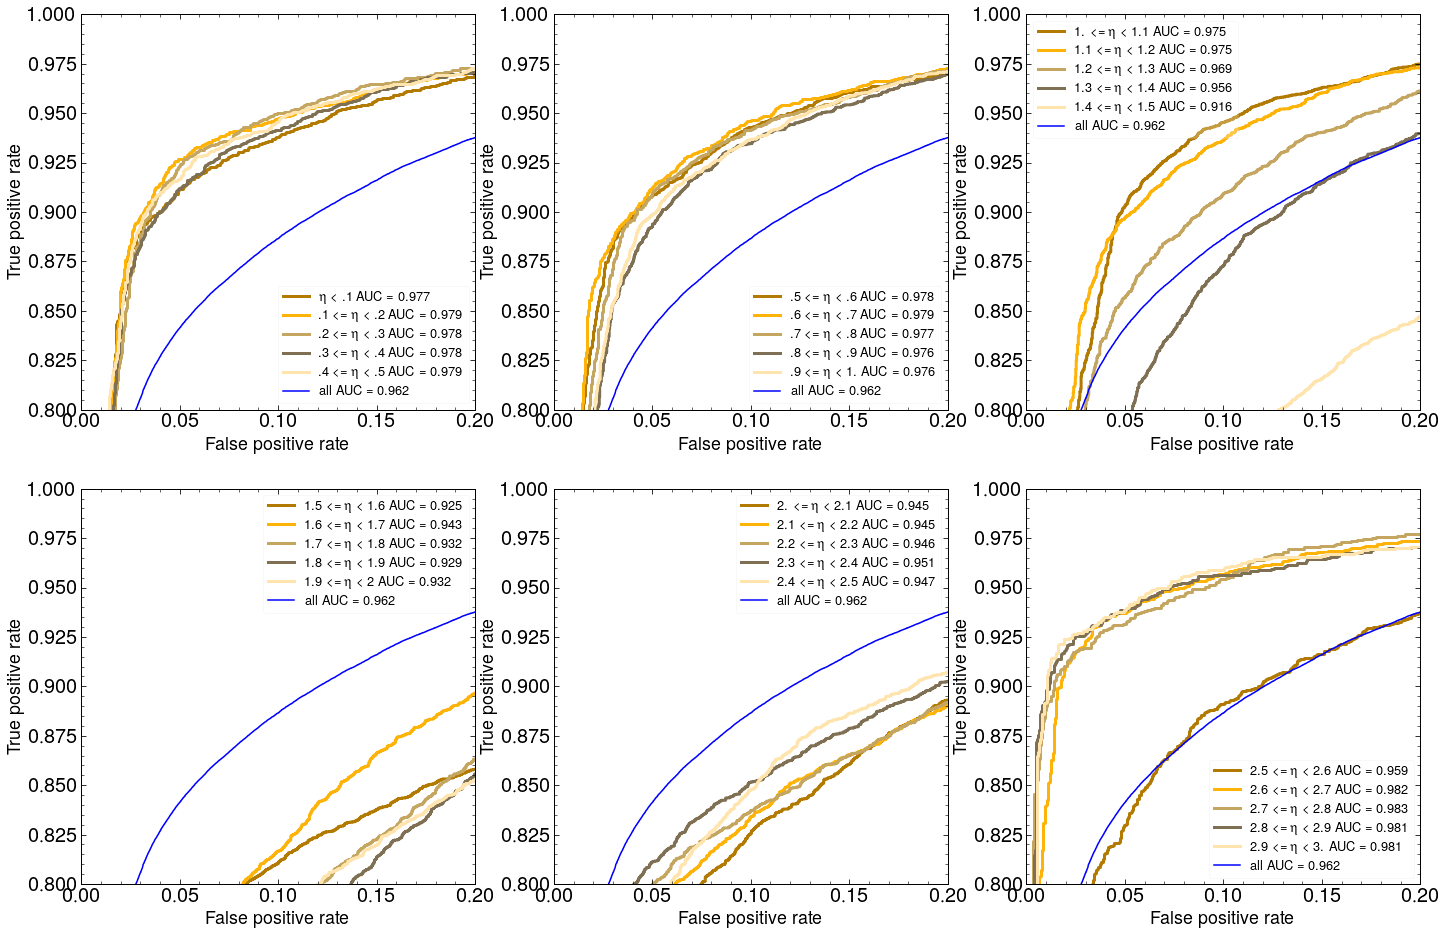

In [21]:
AUCplot(eta_ranges, fps_bigp_eta, tps_bigp_eta, auc_bigp_eta, rangetype='eta')